In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "ebayAuctions.xlsx"
df = pd.read_excel(file_path, sheet_name='eBay auctions', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   Currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [3]:
df.columns = [c.strip() for c in df.columns]
df.columns

Index(['Category', 'Currency', 'sellerRating', 'Duration', 'endDay',
       'ClosePrice', 'OpenPrice', 'Competitive?'],
      dtype='object')

In [4]:
df = df.drop_duplicates().reset_index(drop=True)

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1626 non-null   object 
 1   Currency      1626 non-null   object 
 2   sellerRating  1626 non-null   int64  
 3   Duration      1626 non-null   int64  
 4   endDay        1626 non-null   object 
 5   ClosePrice    1626 non-null   float64
 6   OpenPrice     1626 non-null   float64
 7   Competitive?  1626 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 101.8+ KB


,sellerRating,Duration,ClosePrice,OpenPrice,Competitive?
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,3503.340098,6.446494,41.885517,13.636304,0.614391
std,6067.840716,2.104624,97.342479,41.955216,0.486889
min,0.000000,1.000000,0.010000,0.010000,0.000000
25%,520.000000,5.000000,5.500000,1.230000,0.000000
50%,1550.000000,7.000000,12.135000,4.500000,1.000000
75%,3277.000000,7.000000,33.820000,9.990000,1.000000
max,37727.000000,10.000000,999.000000,999.000000,1.000000


In [6]:
df['competitive'] = df['Competitive?'].astype(bool)

In [7]:
numeric = df.select_dtypes(include=[np.number]).drop(columns=['Competitive?']).columns.tolist()
categorical = df.select_dtypes(include=['object','category']).columns.tolist()

numeric, categorical

(['sellerRating', 'Duration', 'ClosePrice', 'OpenPrice'],
 ['Category', 'Currency', 'endDay'])

In [8]:
def mark_outliers(s, lower=0.01, upper=0.99):
    lo, hi = s.quantile([lower, upper])
    return (s < lo) | (s > hi)

# Only continuous features
cont_cols = ['OpenPrice', 'ClosePrice', 'sellerRating']

for c in cont_cols:
    df[f"{c}_outlier"] = mark_outliers(df[c])

In [9]:
dummies = pd.get_dummies(df[categorical], drop_first=False)
data = pd.concat([df[numeric + ['competitive']], dummies], axis=1)
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   sellerRating                   1626 non-null   int64  
 1   Duration                       1626 non-null   int64  
 2   ClosePrice                     1626 non-null   float64
 3   OpenPrice                      1626 non-null   float64
 4   competitive                    1626 non-null   bool   
 5   Category_Antique/Art/Craft     1626 non-null   bool   
 6   Category_Automotive            1626 non-null   bool   
 7   Category_Books                 1626 non-null   bool   
 8   Category_Business/Industrial   1626 non-null   bool   
 9   Category_Clothing/Accessories  1626 non-null   bool   
 10  Category_Coins/Stamps          1626 non-null   bool   
 11  Category_Collectibles          1626 non-null   bool   
 12  Category_Computer              1626 non-null   b

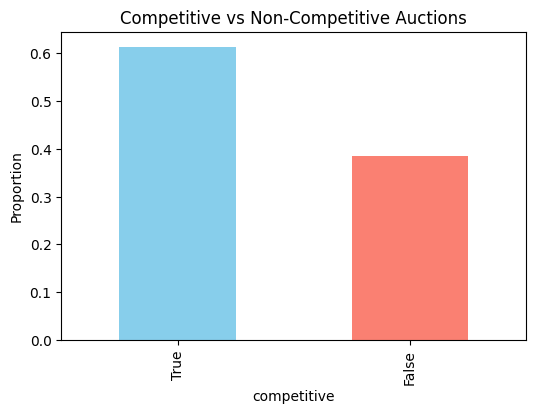

In [10]:
fig1 = plt.figure(figsize=(6,4))
ax1 = fig1.add_subplot(1,1,1)
counts = df['competitive'].value_counts(normalize=True).plot(kind='bar', color=['skyblue','salmon'])
plt.title("Competitive vs Non-Competitive Auctions")
plt.ylabel("Proportion")
plt.show()

C:\Users\Austi\AppData\Local\Temp\ipykernel_14000\2450608823.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([lp0, lp1], labels=['Non-comp','Comp'])


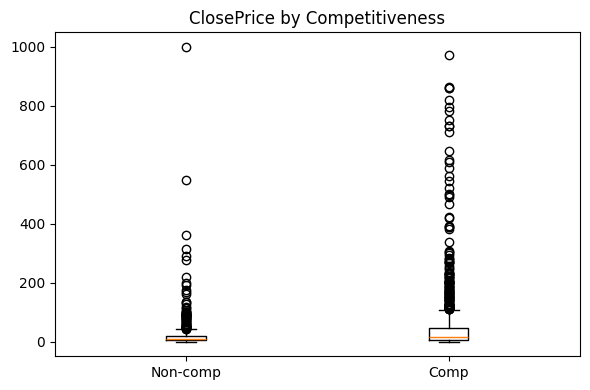

In [11]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)
lp0 = (df.loc[df['competitive']==0,'ClosePrice'].dropna())
lp1 = (df.loc[df['competitive']==1,'ClosePrice'].dropna())
ax2.boxplot([lp0, lp1], labels=['Non-comp','Comp'])
ax2.set_title('ClosePrice by Competitiveness')
plt.tight_layout()
plt.show()

C:\Users\Austi\AppData\Local\Temp\ipykernel_14000\2788039740.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax2.boxplot([lp0, lp1], labels=['Non-comp','Comp'])


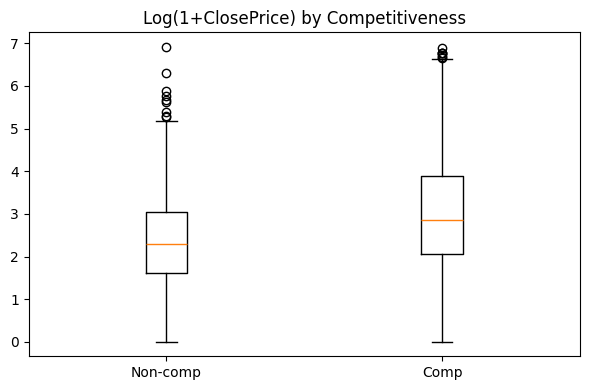

In [12]:
fig2 = plt.figure(figsize=(6,4))
ax2 = fig2.add_subplot(1,1,1)
lp0 = np.log1p(df.loc[df['competitive']==0,'ClosePrice'].dropna())
lp1 = np.log1p(df.loc[df['competitive']==1,'ClosePrice'].dropna())
ax2.boxplot([lp0, lp1], labels=['Non-comp','Comp'])
ax2.set_title('Log(1+ClosePrice) by Competitiveness')
plt.tight_layout()
plt.show()

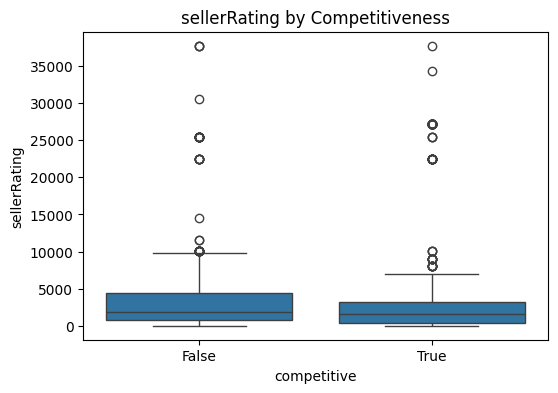

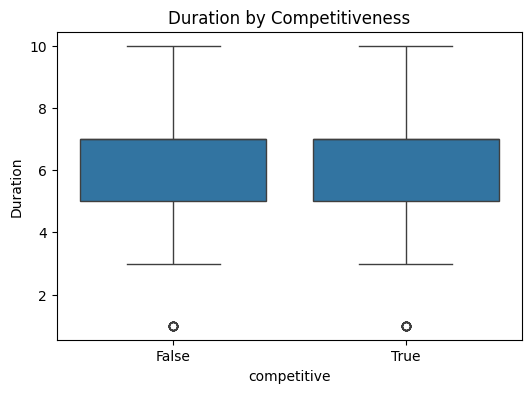

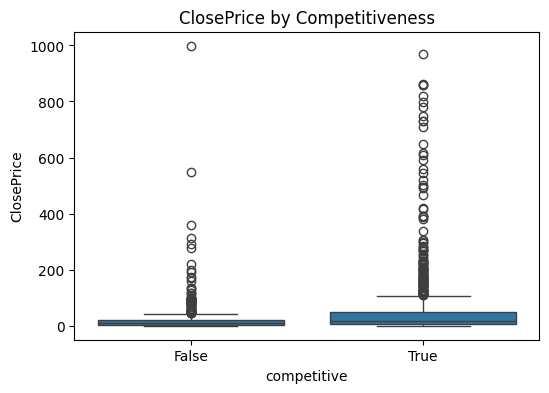

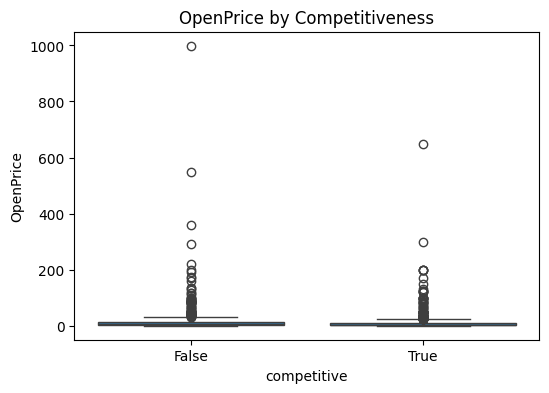

In [13]:
for col in numeric:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='competitive', y=col, data=df)
    plt.title(f"{col} by Competitiveness")
    plt.show()

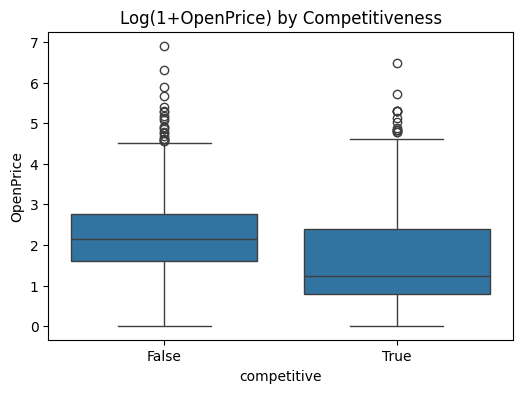

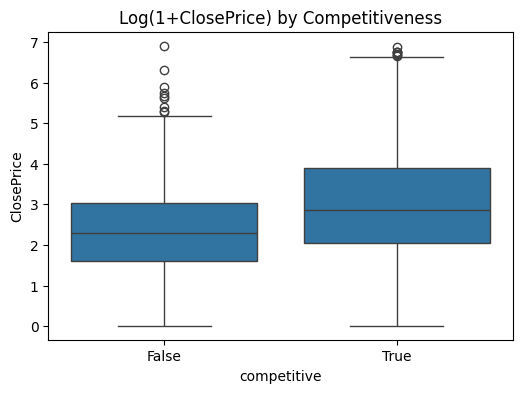

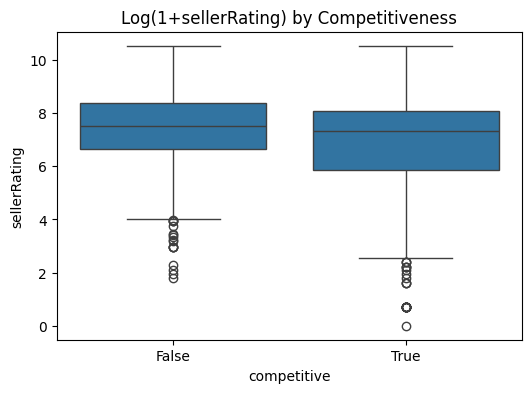

In [14]:
log_cols = ['OpenPrice', 'ClosePrice', 'sellerRating']

# Log-scale plots
for col in log_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='competitive', y=np.log1p(df[col]), data=df)
    plt.title(f"Log(1+{col}) by Competitiveness")
    plt.show()

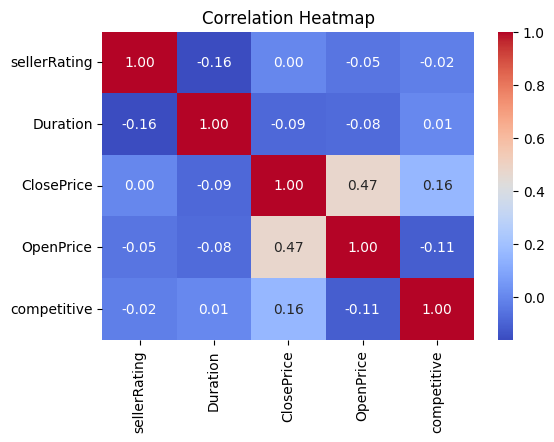

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric + ['competitive']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\Austi\AppData\Local\Temp\ipykernel_14000\3627346792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")


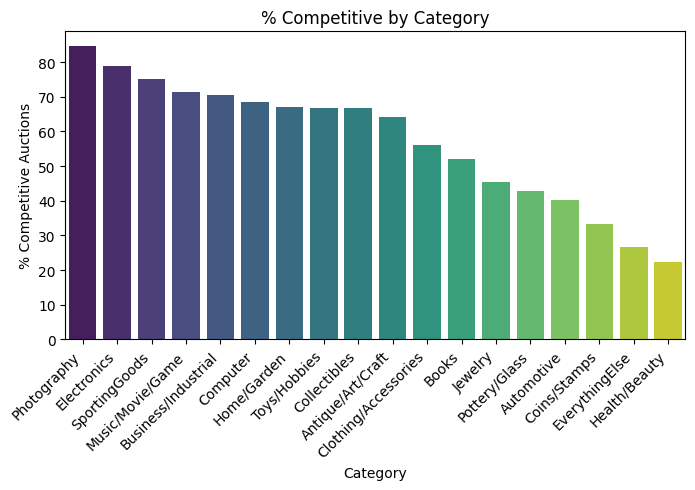

C:\Users\Austi\AppData\Local\Temp\ipykernel_14000\3627346792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")


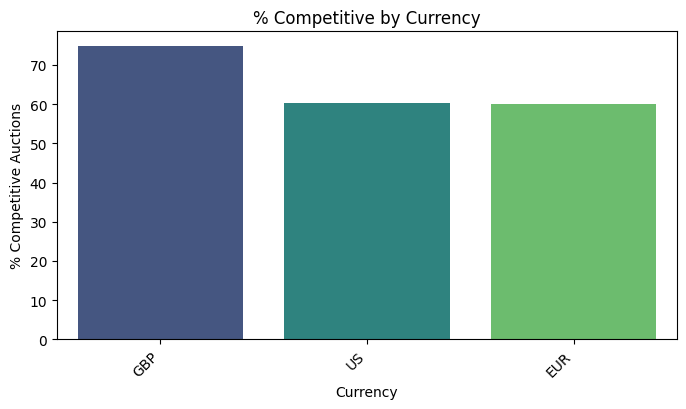

C:\Users\Austi\AppData\Local\Temp\ipykernel_14000\3627346792.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")


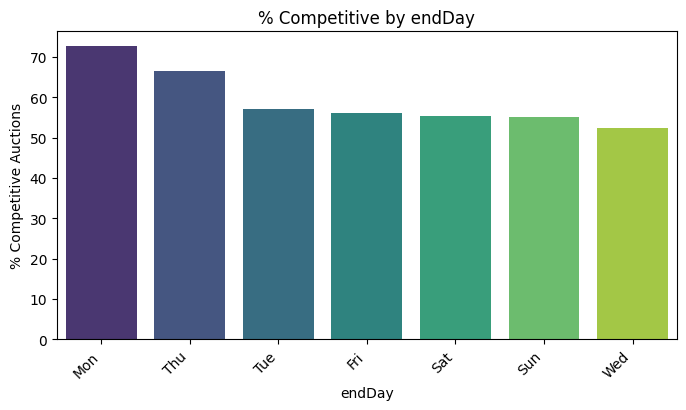

In [16]:
for col in categorical:
    comp_rates = df.groupby(col)['competitive'].mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(8,4))
    sns.barplot(x=comp_rates.index, y=comp_rates.values, palette="viridis")
    plt.title(f"% Competitive by {col}")
    plt.ylabel("% Competitive Auctions")
    plt.xticks(rotation=45, ha="right")
    plt.show()

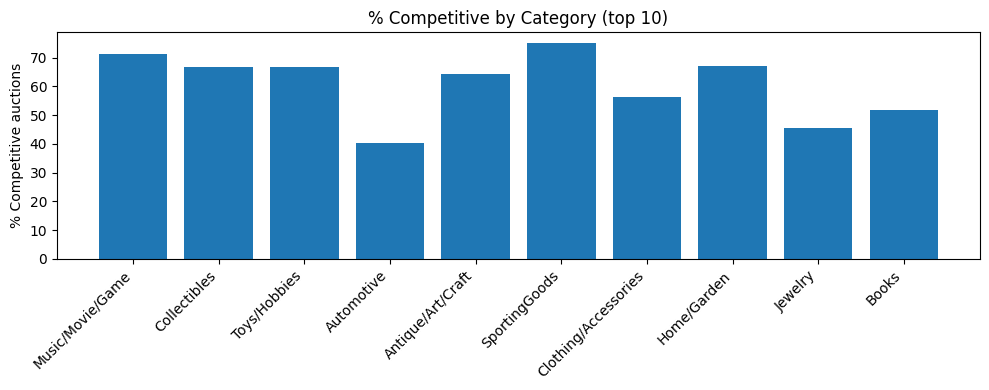

In [17]:
topcats = df['Category'].value_counts().nlargest(10).index.tolist() # top 10 categories by frequency
# filter only those 10 categories
# average of "competitive" (True=1), % competitive
# reorder to match frequency ranking
perc_comp = (df[df['Category'].isin(topcats)].groupby(df['Category'])['competitive'].mean() * 100).reindex(topcats)                      
fig3 = plt.figure(figsize=(10,4))
ax3 = fig3.add_subplot(1,1,1)
ax3.bar(range(len(topcats)), perc_comp)
ax3.set_xticks(range(len(topcats)))
ax3.set_xticklabels(topcats, rotation=45, ha='right')
ax3.set_ylabel('% Competitive auctions')
ax3.set_title(f"% Competitive by Category (top {len(topcats)})")
plt.tight_layout()
plt.show()

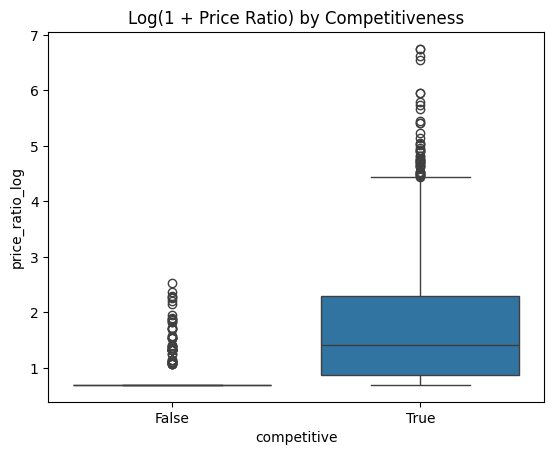

In [18]:
# Sometimes it’s not the absolute prices but the markup that drives competitiveness.
# If price_ratio ≈ 1, auction closed near opening price, not many bids.
# If price_ratio >> 1, price grew a lot, competitive bidding.
# Log-transform price ratio
df['price_ratio'] = (df['ClosePrice'] + 1) / (df['OpenPrice'] + 1)
df['price_ratio_log'] = np.log1p(df['price_ratio'])
sns.boxplot(x='competitive', y='price_ratio_log', data=df)
plt.title("Log(1 + Price Ratio) by Competitiveness")
plt.show()


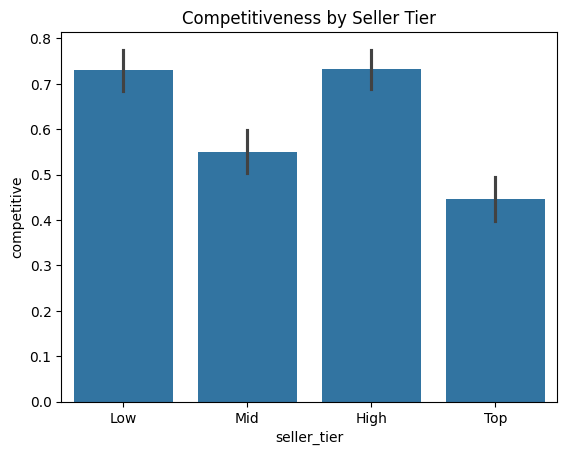

In [19]:
# Seller ratings are highly skewed; cut them into bins (newbie, mid, pro, power seller).
# Competitive auctions might be concentrated in trusted sellers.
df['seller_tier'] = pd.qcut(df['sellerRating'], q=4, labels=["Low","Mid","High","Top"])
sns.barplot(x='seller_tier', y='competitive', data=df, estimator=np.mean)
plt.title("Competitiveness by Seller Tier")
plt.show()

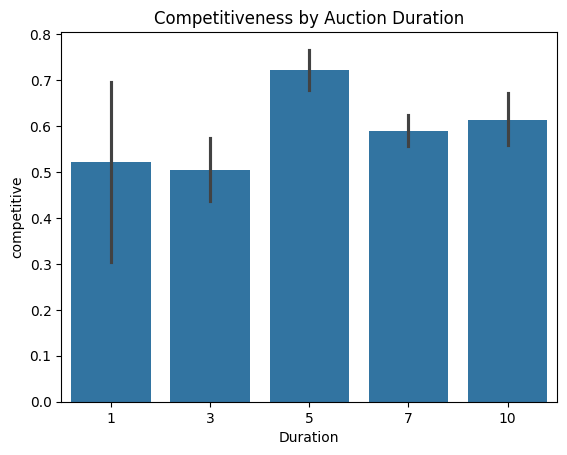

In [20]:
# Auctions of 3, 5, 7, 10 days may show very different competitiveness rates.
# A short 3-day auction might get fewer bids, but 7-day might build hype.
sns.barplot(x='Duration', y='competitive', data=df, estimator=np.mean)
plt.title("Competitiveness by Auction Duration")
plt.show()

C:\Users\Austi\AppData\Local\Temp\ipykernel_14000\3073379829.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index="Category", columns="seller_tier", values="competitive", aggfunc="mean")


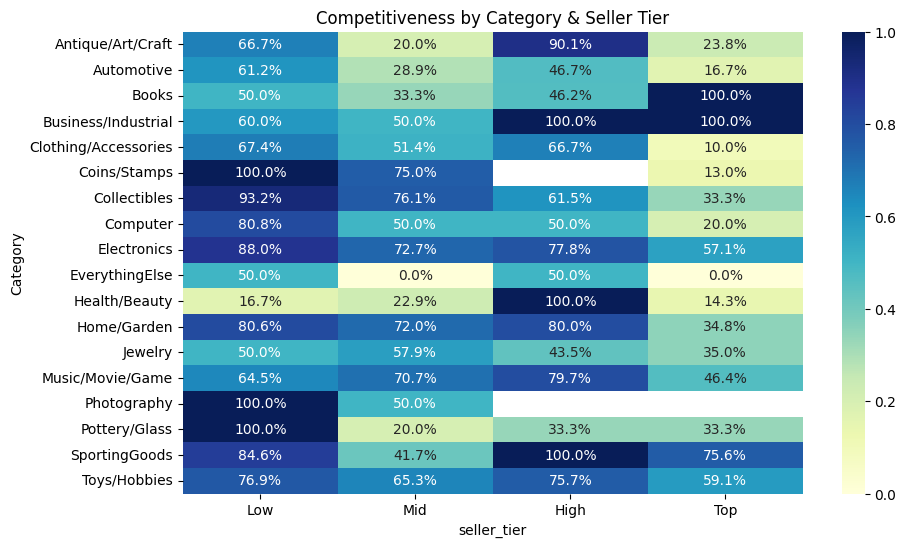

In [21]:
# Maybe high-rated sellers dominate competitive categories (e.g. Electronics, Jewelry).
# Heatmap can reveal that interaction.
pivot = df.pivot_table(index="Category", columns="seller_tier", values="competitive", aggfunc="mean")
plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt=".1%", cmap="YlGnBu")
plt.title("Competitiveness by Category & Seller Tier")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [23]:
y = df["Competitive?"].astype(int)

In [24]:
X = df.drop(columns=["Competitive?"])

In [25]:
leak_cols = ["ClosePrice", "price_ratio", "price_ratio_log"]
X = X.drop(columns=[c for c in leak_cols if c in X.columns])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42, stratify=y
)
len(X_train), len(X_test), y_train.mean(), y_test.mean()

(975, 651, np.float64(0.6143589743589744), np.float64(0.6144393241167435))

In [27]:
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
        ("num", StandardScaler(), num_cols),
    ],
    remainder="drop",
)

In [28]:
pipe = Pipeline([
    ("prep", preprocess),
    ("knn", KNeighborsClassifier())
])

In [29]:
k_values = list(range(1, 32, 1))
cv_scores = []

for k in k_values:
    model = Pipeline([
        ("prep", preprocess),
        ("knn", KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
    cv_scores.append(scores.mean())

best_k = k_values[int(np.argmax(cv_scores))]
best_k, round(max(cv_scores), 3)

(15, np.float64(0.703))

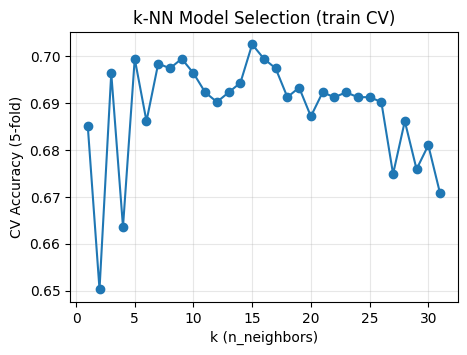

In [30]:
plt.figure(figsize=(5,3.5))
plt.plot(k_values, cv_scores, marker="o")
plt.xlabel("k (n_neighbors)")
plt.ylabel("CV Accuracy (5-fold)")
plt.title("k-NN Model Selection (train CV)")
plt.grid(True, alpha=0.3)
plt.show()

In [31]:
best_model = Pipeline([
    ("prep", preprocess),
    ("knn", KNeighborsClassifier(n_neighbors=best_k))
])
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(
    y_test, y_pred,
    target_names=["Not Competitive (<2 bids)", "Competitive (≥2 bids)"],
    zero_division=0
)

print("=== Columns used ===")
print("Categorical:", cat_cols)
print("Numeric    :", num_cols)

print("\n=== Model selection (5-fold CV on train) ===")
print("k grid:", k_values)
print(f"Best k: {best_k} | CV accuracy: {max(cv_scores):.3f}")

print("\n=== Test performance (60/40 split) ===")
print(f"Test Accuracy: {acc:.3f}\n")
print("Classification Report:")
print(report)

print("Confusion Matrix [rows=true, cols=pred]:")
print(pd.DataFrame(
    cm,
    index=["True: Not Competitive", "True: Competitive"],
    columns=["Pred: Not Competitive", "Pred: Competitive"]
))

=== Columns used ===
Categorical: ['Category', 'Currency', 'endDay', 'seller_tier']
Numeric    : ['sellerRating', 'Duration', 'OpenPrice']

=== Model selection (5-fold CV on train) ===
k grid: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Best k: 15 | CV accuracy: 0.703

=== Test performance (60/40 split) ===
Test Accuracy: 0.677

Classification Report:
                           precision    recall  f1-score   support

Not Competitive (<2 bids)       0.60      0.49      0.54       251
    Competitive (≥2 bids)       0.71      0.79      0.75       400

                 accuracy                           0.68       651
                macro avg       0.66      0.64      0.65       651
             weighted avg       0.67      0.68      0.67       651

Confusion Matrix [rows=true, cols=pred]:
                       Pred: Not Competitive  Pred: Competitive
True: Not Competitive                    124                127


In [32]:
tn, fp, fn, tp = cm.ravel()
prec = tp / (tp + fp) if (tp + fp) else 0.0
rec  = tp / (tp + fn) if (tp + fn) else 0.0

print("\n=== Interpretation (for business) ===")
print(f"- Using k = {best_k}, accuracy on the hold-out set is {acc:.3f}.")
print(f"- For predicting COMPETITIVE auctions (≥2 bids): "
      f"precision = {prec:.3f}, recall = {rec:.3f}.")
print("- Precision: when we flag an auction as competitive, how often we’re right.")
print("- Recall: of all truly competitive auctions, how many we successfully flag.")
print("- Choose k / threshold to match costs: higher precision to limit promo spend; "
      "higher recall to capture more high-competition opportunities.")


=== Interpretation (for business) ===
- Using k = 15, accuracy on the hold-out set is 0.677.
- For predicting COMPETITIVE auctions (≥2 bids): precision = 0.714, recall = 0.792.
- Precision: when we flag an auction as competitive, how often we’re right.
- Recall: of all truly competitive auctions, how many we successfully flag.
- Choose k / threshold to match costs: higher precision to limit promo spend; higher recall to capture more high-competition opportunities.


In [33]:
# ClosePrice, price_ratio, and price_ratio_log. 
# These are post-auction outcomes (only known after the auction closes). Including them lets the model “cheat,” which is why best 
# 𝑘 was tiny (k=3) and accuracy looked high.

#Now: These columns are dropped. The model only uses features available before or at listing time.
# This makes the prediction realistic, because you can actually use it operationally.